# Breast Cancer Prediction Analysis

## Introduction

Breast cancer is the most common cancer diagnosed in women in United States after skin cancer. About 1 in 8 US women (12%) develop invasive breast cancer over the course of her lifetime. As of January 2019, there are more than 3.1 million women with a history of breast cancer in US. Early and accurate diagnosis of breast cancer has more treatment options and better chance for survival.

Research shows that experienced physicians can detect cancer by 79% accuracy, while a 91 %( sometimes up to 98%) accuracy can be achieved using Machine Learning techniques.

This project aims to observe which algorithm is most helpful to classify tumors into malignant (cancerous) or benign (non-cancerous) using features obtained from several cell images.

## Dataset

The dataset used in this story is publicly available and was created by Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital at Madison, Wisconsin, USA. 

Features are computed from digitized image of fine needle aspirate (FNA) of a breast mass. Dataset has been imported from http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29 site available for public use.

Attribute Information:
1) ID number 
2) Diagnosis (M = malignant, B = benign) 

Ten real-valued features are computed for each cell nucleus: 

a) radius 
b) texture 
c) perimeter 
d) area 
e) smoothness 
f) compactness  
g) concavity  
h) concave points  
i) symmetry 
j) fractal dimension

For each above features, the mean, standard error and max are computed, thus 30 features in total generated for each image.

In our data set ,both input and desired output data is provided and also outcome will be either M(malignant) or B(benign) so we are going to use supervised classification algorithm. 

## Data Exploration

We will be using panda for importing dataset. We are using labelEncoder from scikit library to convert categorical data or text data into numbers so the prediction model can better understand data.

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset

dataset = pd.read_csv('C:/FinalProject/breast_cancer.csv')


In [3]:
dataset.shape

(569, 33)

There are 569 rows and 32 columns in dataset. ‘Diagnosis’ is the column (column#2)which we will predict in program. We are not massaging data as there are no null or empty value in dataset. We verified with below panda function.


In [4]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
X = dataset.loc[:, 'radius_mean':'fractal_dimension_worst']
y = dataset.diagnosis

diagnosis
B    357
M    212
dtype: int64

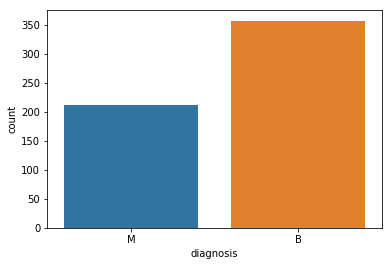

In [8]:
ax = sns.countplot(y,label="Count")
dataset.groupby('diagnosis').size()

In [9]:
X.isnull().sum()
X.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

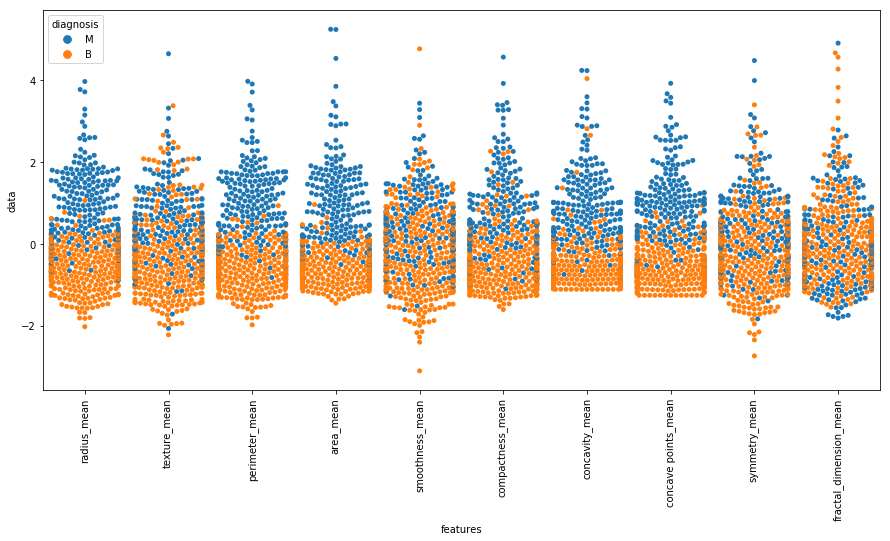

In [10]:
data = (X - X.mean()) / (X.std())              # normalize features
data = pd.concat([y,data.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='data')
plt.figure(figsize=(15,7))
sns.swarmplot(x="features", y="data", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

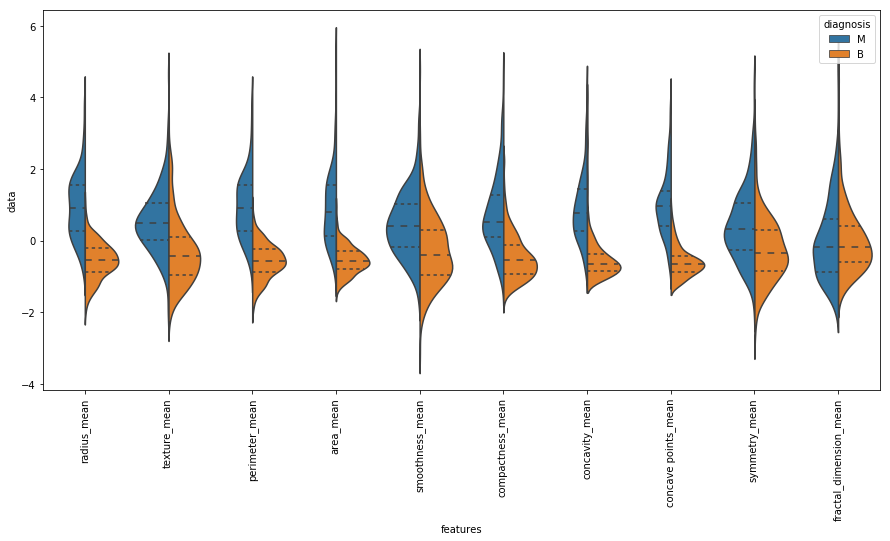

In [11]:
data = (X - X.mean()) / (X.std())              # normalize features
data = pd.concat([y,data.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='data')
plt.figure(figsize=(15,7))
sns.violinplot(x="features", y="data", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Confusion matrix for SVM:
[[88  2]
 [ 2 51]]
Accuracy: 97.20%


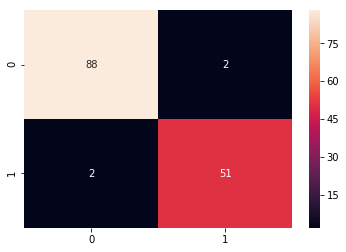

In [14]:
# Algorithm 1: SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix for SVM:")
print(cm)
from sklearn.metrics import accuracy_score
print("Accuracy: "+"{:.2%}".format(accuracy_score(y_test, y_pred)));
sns.heatmap(cm,annot=True)

Confusion matrix for Logistic Regression:
[[87  3]
 [ 3 50]]
Accuracy: 95.80%


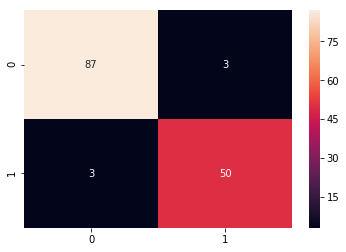

In [15]:
# Algorithm 2: LR
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs',)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix for Logistic Regression:")
print(cm)
print("Accuracy: "+"{:.2%}".format(accuracy_score(y_test, y_pred)));
sns.heatmap(cm,annot=True)

Confusion matrix for KNN:
[[89  1]
 [ 6 47]]
Accuracy: 95.10%


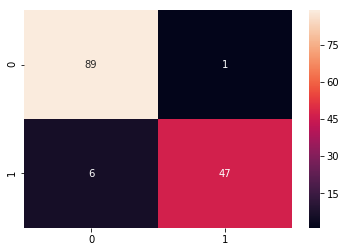

In [16]:
# Algorithm 3: KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix for KNN:")
print(cm)
print("Accuracy: "+"{:.2%}".format(accuracy_score(y_test, y_pred)));
sns.heatmap(cm,annot=True)

Confusion matrix for Naive Bayes:
[[84  6]
 [ 6 47]]
Accuracy: 91.61%


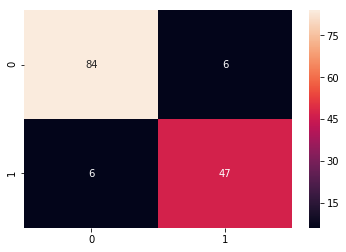

In [17]:
# Algorithm 4: Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix for Naive Bayes:")
print(cm)
print("Accuracy: "+"{:.2%}".format(accuracy_score(y_test, y_pred)));
sns.heatmap(cm,annot=True)

Confusion matrix for Decision Tree:
[[86  4]
 [ 2 51]]
Accuracy: 95.80%


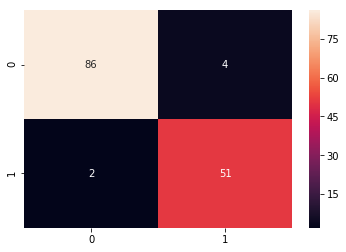

In [18]:
# Algorithm 5: Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state = 0)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix for Decision Tree:")
print(cm)
print("Accuracy: "+"{:.2%}".format(accuracy_score(y_test, y_pred)));
sns.heatmap(cm,annot=True)

Confusion matrix for Random Forest:
[[89  1]
 [ 1 52]]
Accuracy: 98.60%


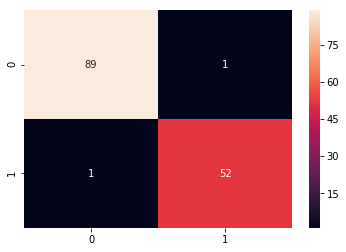

In [19]:
# Algorithm 6: Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state = 0)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix for Random Forest:")
print(cm)
print("Accuracy: "+"{:.2%}".format(accuracy_score(y_test, y_pred)));
sns.heatmap(cm,annot=True)